## CS102 - Further Computing

Mark Howard<br>
School of Mathematical & Statistical Sciences<br>
NUI Galway<br>
mark.howard@nuigalway.ie

## Universal Functions and Broadcasting.
* `numpy` provides efficient **storage** for homogeneous
  multidimensional data.
* `numpy` also provides efficient **operations** on such data.
* Some of these **vectorized** operations are implemented as 
  **universal functions**, or **UFuncs** for short.
* **Broadcasting** is a set of rules for applying binary UFuncs on arrays of different sizes.

## `python`'s  Loops  are slow

* Due to the dynamic, interpreted nature of the language
  certain sequences of operations cannot be compiled into efficient 
  machine code as in languages like `C` and `Fortran`.

* In situations where many small operations are being repeated. for instance when looping over an array,
`python` has to repeat certain checks for each element in the array.

* Some of those checks become unnecessary, when it is known in advance
  that all elements in the array have the same type.

### Example

* For example, let's compute the reciprocals of an array of values.
* We start with defining a `python` function `compute_reciprocals` that takes 
  a list `values` as input and produces the list of reciprocals as output,
  using a simple `for` loop

In [1]:
import numpy as np

In [2]:
def compute_reciprocals(values):
    output = np.empty(len(values))#why is this line a good idea?
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output       

* We prepare a list of 5 random integer values (between $1$ and $9$) ...

In [3]:
values = np.random.randint(1, 10, size=5)
values

array([8, 6, 7, 8, 7])

* ... and apply our function.

In [4]:
compute_reciprocals(values)

array([0.125     , 0.16666667, 0.14285714, 0.125     , 0.14285714])

* Note how the code makes use of the efficient `numpy` data
  structures and how it avoids the need for resizing
  the `output` array.
  
* Now let's time the operation for a bigger array, one with a million elements:

In [5]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.19 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


* It takes more than a second to compute these 1 million reciprocals
  and to store the result!

* For today's standards, that's a long time ...

## Introducing UFuncs

* For this and many other types of operations on arrays, `numpy` provides a **vectorized** 
  alternative.

* This vectorized approach is designed to push the loop into the compiled layer that underlies `numpy`, leading to **much faster** execution.

* A **UFunc** (universal function) is easy to use: simply perform the operation on the array.

In [6]:
1.0 / values

array([0.125     , 0.16666667, 0.14285714, 0.125     , 0.14285714])

* Now we time the UFunc applied to the list of a million values:

In [7]:
%timeit 1.0 / big_array

3.23 ms ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* `ms` here stands for millisecond.  That is one 1000th of a second!

* So the UFunc is **faster by a factor 1000**!! That's 3 orders of magnitude ...

* UFuncs are extremely flexible: they work for example with two arrays of the same shape:

In [8]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

* UFunc operations can also act on multi-dimensional arrays:

In [9]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

* UFuncs are nearly always more efficient than `Python` loops, especially as the arrays grow in size.

## Exploring `numpy`'s UFuncs

* All of `python`s standard operators, **unary** operators, which operate on a single input, and **binary** operators, which operate on two inputs, have a corresponding UFunc in `numpy`.  In most cases these can be conveniently accessed through the same symbol.

### Array arithmetic

* `numpy`'s UFuncs make use of `Python`'s native arithmetic operators,
e.g., for addition, subtraction, multiplication, and division (all binary).

In [10]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division (related to % )
print("x % 2 =", x % 2)  # modulo (related to // )

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
x % 2 = [0 1 0 1]


* There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [11]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


* UFuncs can be strung together, and the standard order of operations is respected:

In [12]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

* Each of these arithmetic operations are simply convenient wrappers around specific functions built into `NumPy`; for example, the `+` operator is a wrapper for the `add` function:

In [13]:
np.add(x, 2)

array([2, 3, 4, 5])

* The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent Ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|
|`abs`          |`np.absolute`        |Absolute value (e.g., `abs(-3) = 3`)   |

* Additionally there are Boolean/bitwise operators ... 

**From the `NumPy` documentation:<br>**
There are currently more than 60 universal functions defined in numpy on one or more types, covering a wide variety of operations. Some of these ufuncs are called automatically on arrays when the relevant infix notation is used (e.g., `add(a, b)` is called internally when `a + b` is written and `a` or `b` is an ndarray). Nevertheless, you may still want to use the ufunc call in order to use the optional output argument(s) to place the output(s) in an object (or objects) of your choice.

### Trigonometric functions

In [14]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

* Compute some trigonometric functions on these values:

In [15]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


* The values are computed to within machine precision: some zero 
values do not always hit exactly zero.

In [16]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and Logarithms

* The function `np.exp` yields the exponential (base $e$), `np.exp2` yields $2^x$, and other exponentials can be computed with `np.power`.

In [17]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


* The function `np.log` gives the natural logarithm,
`np.log2` the the base-2 logarithm 
and `np.log10` the base-10 logarithm.

In [18]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


## Advanced UFunc Features

### Specifying output

* For large calculations, it is sometimes useful 
  or even necessary
  to specify the array where the result
  of the calculation will be stored.

* For all UFuncs, this can be done with the
  `out` argument of the function:

In [19]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


* This also works with array views. For example, to write the results of a computation to every other element of a specified array:

In [20]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(x)
print(y)

[0 1 2 3 4]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


* Note that the code `y[::2] = 2 ** x` results in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the ``y`` array.

### Aggregates and Accumulations

* An **aggregate** is a whole formed by combining several separate elements.

* Binary UFuncs can be used to compute **aggregates** directly from the object.

* A **reduce operation** repeatedly applies a given operation to the elements of an array until only a single result remains.

* To reduce an array with a particular operation, use the `reduce`
  method of the corresponding UFunc.

* For example, calling `reduce` on the `add` UFunc returns
  the sum of all elements in the array:

In [21]:
x = np.arange(1, 6)
print(x)
np.add.reduce(x)

[1 2 3 4 5]


15

* Similarly, calling `reduce` on the `multiply` ufunc results in the 
  product of all array elements:

In [22]:
print(np.multiply.reduce(x))
print(1*2*3*4*5)

120
120


* To store and return all the intermediate results of the computation, 
  use `accumulate` instead:

In [23]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [24]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

* In fact, for these particular cases, `numpy` has dedicated functions 
* ``np.sum``=`` ``, 
* ``np.prod``=`` ``, 
* ``np.cumsum``=`` ``, 
* ``np.cumprod`` =`` ``


## UFuncs in higher dimensions

* Binary UFunc operations can be applied to two arrays of the **same shape**.
* Here, the operation will simply be applied to elements in corresponding positions in the two arrays,
  resulting in a new array of the **same shape**.

* Here is a product of a $1$-dim'l `x` with itself.

In [25]:
print(x)
np.multiply(x, x)

array([ 1,  4,  9, 16, 25])

* Now for a $2$-dim'l array `a`.

In [26]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

* Add it to itself ...

In [27]:
a + a

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

* ... and multiply it with itself:

In [28]:
a * a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

<div class="alert alert-danger">

* **CAUTION:** note that this kind of multiplication of `numpy` arrays is **very different** from the matrix multiplication in Linear Algebra.
</div>

## Broadcasting

* UFuncs can even operate between arrays of **different shapes** and **sizes**, via a convention known as **broadcasting** ...

* Broadcasting is a **set of rules** for applying binary UFuncs on arrays of different sizes.

* Recall: for arrays of the same shape, binary operations are performed on an element-by-element basis:

In [29]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

* The same result is obtained by adding the **scalar** $5$
  (a zero-dimensional array) to the array `a`.

In [30]:
a + 5

array([5, 6, 7])

* Think of this as an operation that first stretches or duplicates the value `5` into the array `[5, 5, 5]`, and then adds the two arrays
of the same shape.

* Inside `numpy`, this duplication of values does not actually take place, but it helps to describe how broadcasting works.

* The concept extends to arrays of higher dimension, e.g, the sum
  of a one-dimensional array (a matrix) and a two-dimensional array
  (a vector):

In [31]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
a

array([0, 1, 2])

In [33]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

* Here the one-dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`.

* More complicated cases can involve broadcasting of both arrays
  in order to yield a common shape.
  
* The sum of a row vector and a column vector, for example:

In [34]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [35]:
amat=np.array([[0,1,2],[0,1,2],[0,1,2]])
bmat=np.array([[0,0,0],[1,1,1],[2,2,2]])
print(amat)
print(bmat)
amat+bmat

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

Broadcasting in `NumPy` follows a **strict set of rules** to determine the interaction between the two arrays:

- **Rule 1:** If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is **padded** with ones on its leading (left) side.
- **Rule 2:** If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [36]:
M = np.ones((2, 3))
a = np.arange(3)

In [37]:
M.shape

(2, 3)

In [38]:
a.shape

(3,)

The shapes of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Rule 1: the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Rule 2: the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and the final shape will be ``(2, 3)``:

In [39]:
print(a) # shape = (3,)

print(np.array([a])) #shape = (1, 3)

print(np.concatenate([[a], [a]], axis=0)) #shape = (2, 3)

[0 1 2]
[[0 1 2]]
[[0 1 2]
 [0 1 2]]


In [40]:
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [41]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

* Let's take a look at an example where **both arrays need to be broadcast**:

In [42]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


Start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1: pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Rule 2: upgrade **each** of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible.

In [43]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [44]:
print("a=",a)
print("\n b=",b)
print("\n(broadcast) a")
print(np.concatenate([a,a,a], axis=1)) #shape = (3, 3)
print("\n(broadcast) b")
print(np.concatenate([[b], [b], [b]], axis=0)) #shape = (3, 3)
a+b

a= [[0]
 [1]
 [2]]

 b= [0 1 2]

(broadcast) a
[[0 0 0]
 [1 1 1]
 [2 2 2]]

(broadcast) b
[[0 1 2]
 [0 1 2]
 [0 1 2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

* Finally, let's take a look at an example in which the two arrays are not compatible:

In [45]:
M = np.ones((3, 2));  print(M)
a = np.arange(3);     print("\n",a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]

 [0 1 2]


The matrix ``M`` is transposed, compared to the first example.
The shapes of the arrays now are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Rule 1: pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Rule 2: the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Rule 3: the final shapes do not match, so these two arrays are incompatible.

* The command
```python
M + a
```
would now result in an error ...

In [46]:
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

* If right-side padding is really needed, one can always reshape the array explicitly:

In [47]:
a[:, np.newaxis].shape

(3, 1)

In [48]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [49]:
print("M=",M)
print("\n(broadcast) a[:, np.newaxis]")
print(np.concatenate([a[:, np.newaxis],a[:, np.newaxis]],axis=1))
M+a[:, np.newaxis]

M= [[1. 1.]
 [1. 1.]
 [1. 1.]]

(broadcast) a[:, np.newaxis]
[[0 0]
 [1 1]
 [2 2]]


array([[1., 1.],
       [2., 2.],
       [3., 3.]])

* The examples have focused on the ``+`` operator.
* These broadcasting rules apply to **any** binary ``ufunc``.
* For an exotic example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [50]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

* Broadcasting operations will be extremely useful as we move on.

### Centering an array
* Imagine you have an array of 10 observations, each of which consists of 3 values.

* Store this data in a $10 \times 3$ array:

In [51]:
X = np.random.random((10, 3))
X

array([[0.89414755, 0.26172481, 0.5286757 ],
       [0.16128475, 0.0881635 , 0.61042872],
       [0.3865684 , 0.12033552, 0.23098826],
       [0.40217358, 0.88268663, 0.39771077],
       [0.5811903 , 0.11748712, 0.20855759],
       [0.12527646, 0.54315986, 0.29549111],
       [0.68099702, 0.93451343, 0.76618971],
       [0.14191773, 0.24246469, 0.09072857],
       [0.46772407, 0.06892006, 0.04309208],
       [0.80084532, 0.70409799, 0.21656028]])

* Compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [52]:
Xmean = X.mean(0)
Xmean

array([0.46421252, 0.39635536, 0.33884228])

* Center the ``X`` array by subtracting the mean (via broadcasting):

In [53]:
X_centered = X - Xmean
X_centered

array([[ 0.42993503, -0.13463055,  0.18983342],
       [-0.30292777, -0.30819186,  0.27158644],
       [-0.07764411, -0.27601984, -0.10785402],
       [-0.06203894,  0.48633127,  0.05886849],
       [ 0.11697779, -0.27886824, -0.13028469],
       [-0.33893605,  0.1468045 , -0.04335117],
       [ 0.21678451,  0.53815807,  0.42734743],
       [-0.32229479, -0.15389067, -0.24811371],
       [ 0.00351155, -0.3274353 , -0.2957502 ],
       [ 0.3366328 ,  0.30774263, -0.12228199]])

* Check that the centered array has near zero mean:

In [54]:
X_centered.mean(0)

array([3.33066907e-17, 0.00000000e+00, 4.44089210e-17])

* To within machine precision, the mean is now zero.

### Plotting a two-dimensional function

* Broadcasting can be used to compute a function $z = f(x, y)$ across a grid.
* For example, $f(x, y) = \sin^{10} x + \cos(10 + yx) \cos(x)$: 

In [55]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

* Use `Matplotlib` to plot this two-dimensional array of values:

In [56]:
import matplotlib.pyplot as plt

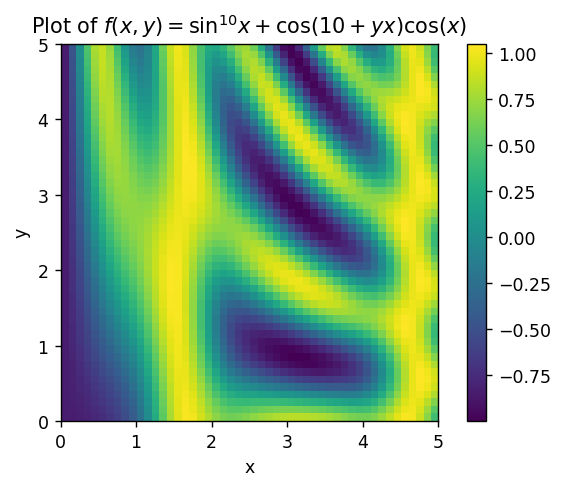

In [71]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');
plt.title(r"Plot of $f(x, y) = \sin^{10} x + \cos(10 + yx) \cos(x)$");
plt.rcParams['figure.dpi'] = 125;

* ...

## References

* UFuncs [[doc]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

## Exercises

* Create a $4 \times 5$ array `x` of random integers between $1$ and $99$.
* Add $100$ to each entry in `x` to obtain a $4 \times 5$ array `y` of integers between $101$ and $199$.
* Now, what is `y - x`?

* Create a $1$-dimensional array `a` of $5$ random (real) numbers between $0$ and $10$.
* Create a $1$-dimensional array `b` of $3$ random (real) numbers between $-1$ and $1$
  and reshape it into a column vector.
* Now, what is the shape of the product `a * b`, and what are its elements (in relation to `a` and `b`)?

* Use single numpy array and a suitable UFunc with broadcasting to quickly compute the multiplication
  table of all products $m \cdot n$, for both $m$ and $n$ in $\{1, 2, 3, \dots, 12\}$.